# Лабораторная работа 1.2

Полученные коэффициент пропорциональности: a*10^3 =  1.38 +- 0.02


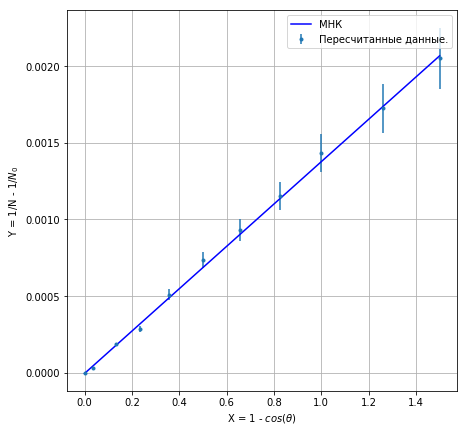

In [72]:
#Проведение эксперимента:
import matplotlib as mpl
import pandas as pd
import matplotlib.pyplot as plt
from scipy.optimize import curve_fit
from matplotlib import mlab
from scipy import interpolate
import math as mth
import warnings
warnings.filterwarnings('ignore')

def myFunction(x, a, b): 
     return a*x+b

# Парсинг данных.
data = pd.read_table('measurements', sep = '\s+' )
angle = data['angle']
channel = data['channel']
channel_err = data['channel_err']


X = [0.01]*len(angle)
for i in range(len(angle)):
    X[i] = 1-mth.cos(angle[i]*pi/180) 

Y = [0.01]*len(angle)
for i in range(len(angle)):
    Y[i] = 1/channel[i] - 1/channel[0]
    

Y_err = [0.01]*len(angle)
for i in range(len(angle)):
    Y_err[i] = (1/channel[i])**2*channel_err[i]
    
    
# Мнк
xlist = mlab.frange (X[0], X[len(X)-1], 0.005)
result = curve_fit(f = myFunction, xdata= X, ydata= Y, sigma = Y_err,absolute_sigma = True )
popt, pcov = result    
  
plt.figure(figsize= (7,7)) 
plt.errorbar(X,Y,yerr = Y_err,fmt = '.',label = 'Пересчитанные данные.') 
plt.plot(xlist, myFunction(xlist, *popt), label='МНК',color = 'blue')
plt.xlabel("X = 1 - $cos(θ)$")
plt.ylabel("Y = 1/N - $1/N_0$")
plt.grid()
plt.legend();   

a,b = popt
print("Полученные коэффициент пропорциональности: a*10^3 = ", (a*1000).round(2),"+- 0.02")

## Определим энергию частицы, на которой происходит комптоновское рассеяние.

\begin{equation}
mc^2 = E_{\gamma}\frac{N(90)}{N(0)-N(90)}
\end{equation}

In [73]:
'''
mc^2 = E_gamma/a
'''
print("mc^2 = 480 +- 11 Мэв")

mc^2 = 480 +- 11 Мэв
